## Basic Autoencoder Implementation using Pytorch

In this notebook we are going to implement a basic autoencoder which more or less acts like PCA.

Lets begin by importing the necessary packages.

In [1]:
## Importing necessary packages ##

import torch
import torch.nn as nn

from tqdm import tqdm

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import numpy as np

Now lets make a fake dataset.

We are going to make a dataset of 100 samples with each sample having 3 values.

In [2]:
## Creating dummy dataset ##

dataset = torch.randn(100 , 3)

print('The dataset is of size :' , dataset.shape)

print('The first sample is :' , dataset[0])

The dataset is of size : torch.Size([100, 3])
The first sample is : tensor([ 0.5269, -0.3919,  0.4355])


Lets also the check the max and the min values.

In [3]:
## Maximum and the minimum values ##

max_val = torch.max(dataset)

min_val = torch.min(dataset)

print('The maximum value is :' , max_val.item())

print('The minimum value is :' , min_val.item())

The maximum value is : 2.8926048278808594
The minimum value is : -3.050226926803589


Since we would need to plot the values, we need to transform them such that they range from 0 to 1.

In [4]:
## Transformation function ##

def transform(x):
    
    new_x = (x - min_val) / (max_val - min_val)
    
    return new_x

transformed_data = dataset.apply_(transform)

## Checking the maximum value, minimum value and the first sample ##

print('The maximum value :' , torch.max(transformed_data))

print('The minimum value :' , torch.min(transformed_data))

print('The first sample :' , transformed_data[0])

The maximum value : tensor(1.)
The minimum value : tensor(0.)
The first sample : tensor([0.6019, 0.4473, 0.5865])


Now lets visualize the dataset.

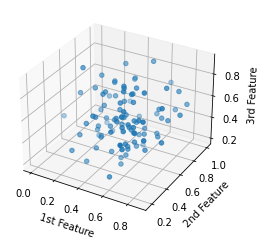

In [5]:
## Visualization of the dataset ##

fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.set_xlabel('1st Feature')
ax.set_ylabel('2nd Feature')
ax.set_zlabel('3rd Feature')

x = []
y = []
z = []

for each_sample in transformed_data:
    x.append(each_sample[0].item())
    y.append(each_sample[1].item())
    z.append(each_sample[2].item())
    
ax.scatter3D(x , y , z)
plt.show()

Now lets set our autoencoder.

Its going to be very simple.

2 layered network.

1 hidden layer and 1 output layer. The output layer will try to reconstruct the input hence will have have number of neurons as the input.

We won't have any activation functions since we are framing PCA, hence only linearity is needed.

In [6]:
## Defining our autoencoder model ##

class PCA_AE(nn.Module):
    
    def __init__(self , in_dim = 3 , hidden_dim = 2 , out_dim = 3):
        
        super().__init__()
        
        self.encoder = nn.Linear(in_dim , hidden_dim)
        
        self.decoder = nn.Linear(hidden_dim , out_dim)
        
    def forward(self , x):
        
        z_space = self.encoder(x)
        
        out = self.decoder(z_space)
        
        return z_space , out
    
## Setting our model object ##

model = PCA_AE()

model

PCA_AE(
  (encoder): Linear(in_features=3, out_features=2, bias=True)
  (decoder): Linear(in_features=2, out_features=3, bias=True)
)

And our model is set.

Now lets set our loss function.

We are going to set it as MSE loss function and also set the optimizer as Adam.

In [7]:
## Defining the loss function ##

loss_func = nn.MSELoss()

## Defining Optimizer ##

optim = torch.optim.Adam(model.parameters() , lr = 1e-2)

Now we are going to train our model.

In [8]:
## Training our model ##

num_epochs = 20

loop = tqdm(range(num_epochs))

for epoch in loop:

    for sample in transformed_data:
    
        optim.zero_grad()
    
        z_space , out = model(sample)
    
        loss = loss_func(out , sample)
    
        loss.backward()
    
        optim.step()
    
        loop.set_description('Epoch : {} / {}'.format(epoch + 1 , num_epochs))
        
        loop.set_postfix(loss = loss.item())

Epoch : 20 / 20: 100%|███████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.85it/s, loss=0.00609]


In [9]:
## Saving the output ##

out_dim1 = []
out_dim2 = []

model.eval()

for sample in transformed_data:
    
    latent , _ = model(sample)
    
    out_dim1.append(latent[0].item())
    out_dim2.append(latent[1].item())

Now lets visualize the latent and the input side by side.

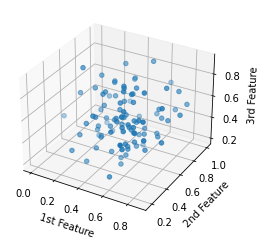

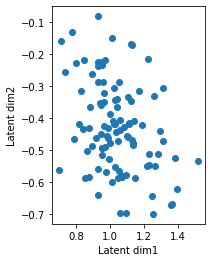

In [10]:
## Visualization of the dataset ##

fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.set_xlabel('1st Feature')
ax.set_ylabel('2nd Feature')
ax.set_zlabel('3rd Feature')
    
ax.scatter3D(x , y , z)
plt.show()

plt.subplot(1 , 2 , 2)
plt.scatter(out_dim1 , out_dim2)
plt.xlabel('Latent dim1')
plt.ylabel('Latent dim2')

plt.show()